In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set(color_codes=True)
titles = pd.read_csv('titles.csv')
cast = pd.read_csv('cast.csv')

In [2]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
c.head()

,title,year,name,type,character,n
950544,An American Werewolf in London,1981,Jim Henson,actor,Kermit the Frog,18.0
950545,Follow That Bird,1985,Jim Henson,actor,Kermit the Frog,2.0
950550,The Great Muppet Caper,1981,Jim Henson,actor,Kermit the Frog,1.0
950558,The Muppet Movie,1979,Jim Henson,actor,Kermit the Frog,1.0
950565,The Muppets Take Manhattan,1984,Jim Henson,actor,Kermit the Frog,1.0


In [3]:
c.groupby('character').size()

character
Kermit the Frog     9
Oscar the Grouch    4
dtype: int64

In [4]:
g = c.groupby(['character', c.year // 10 * 10]).size() # each character per decade
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [5]:
g.unstack()

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [6]:
g.unstack(0)

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [7]:
c_act = cast.groupby([cast.year //10 *10, 'type']).size()
c_act1 = c_act.unstack()
c_act1

type,actor,actress
year,,
1890,2,1
1900,54,16
1910,27093,15481
1920,47846,23566
1930,149864,49085
1940,160537,50928
1950,154897,56340
1960,130829,55956
1970,149722,64956


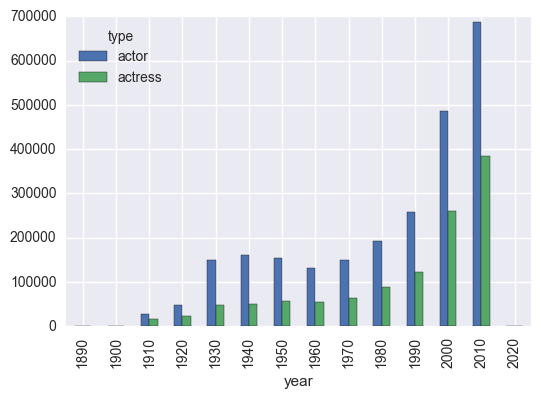

In [8]:
%matplotlib inline
c_act1.plot(kind = 'bar')

#### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

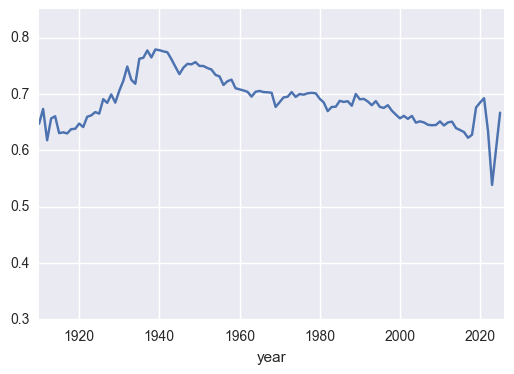

In [9]:
c_act2 = cast.groupby(['year', 'type']).size()
c_act2 = c_act2.unstack()
c_act2.fillna(0)
(c_act2.actor/(c_act2.actor + c_act2.actress)).plot(xlim = 1910, ylim = 0.3)

#### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.¶

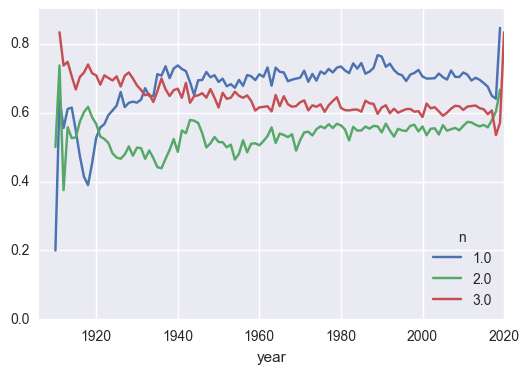

In [10]:
c_act3 = cast[cast.n <= 3]
c_act3 = c_act3.groupby(['year', 'type', 'n']).size()
c_act3 = c_act3.unstack('type')
c_act3.fillna(0)
(c_act3.actor/(c_act3.actor + c_act3.actress)).unstack('n').plot(ylim = 0)

In [11]:
r = pd.read_csv('release_dates.csv')
r.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [12]:
e = cast[cast.name == 'Ellen Page']
e.head()

,title,year,name,type,character,n
3248370,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0
3248371,Freeheld,2015,Ellen Page,actress,Stacie Andree,2.0
3248372,Hard Candy,2005,Ellen Page,actress,Hayley Stark,2.0
3248373,Inception,2010,Ellen Page,actress,Ariadne,3.0
3248374,Into the Forest,2015,Ellen Page,actress,Nell,1.0


In [13]:
ellen_page = e.merge(r)
ellen_page.head()

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1.0,Mexico,2008-08-08


In [14]:
r['date'] = pd.to_datetime(r['date'], errors = 'coerce')

In [15]:
r.date.dt.month.head()

0     6
1     1
2     1
3     1
4    11
Name: date, dtype: int64

In [16]:
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.pivot('title', 'country', 'date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode IX,NaT,2019-05-24,NaT,NaT,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17
Star Wars: Episode VIII,2017-12-15,2017-12-15,NaT,NaT,NaT


#### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [17]:
release_dates = pd.read_csv('release_dates.csv')
release_dates['date'] = pd.to_datetime(release_dates['date'], errors = 'coerce')

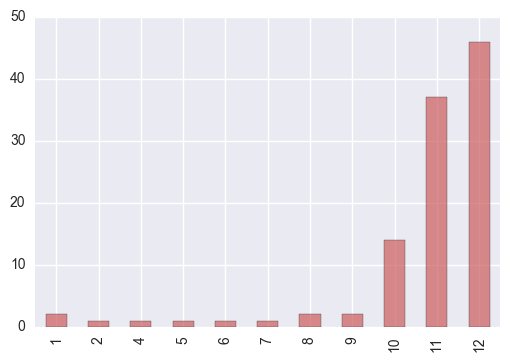

In [18]:
rd = release_dates
rd = rd [rd.title.str.contains ('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind = 'bar', color = 'indianred', alpha = 0.7)

#### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

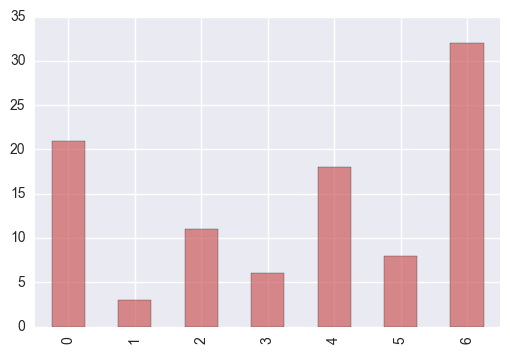

In [19]:
romance = release_dates
romance = romance[romance.title.str.contains("Romance")]
romance = romance[romance.country == "USA"]
romance.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar', color = 'indianred', alpha = 0.7)

#### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

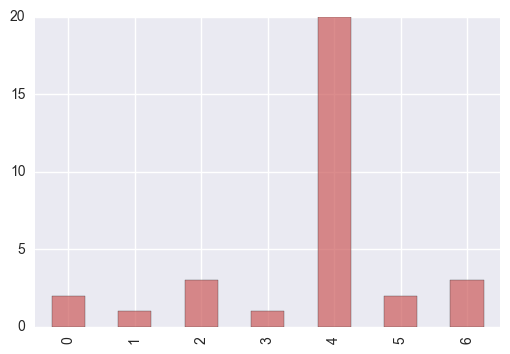

In [20]:
action = release_dates
action = action[action.title.str.contains("Action")]
action = action[action.country == "USA"]
action.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar', color = 'indianred', alpha = 0.7)

#### In which months do films with Tom Cruise tend to be released in the USA?

In [21]:
release_dates.head()


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


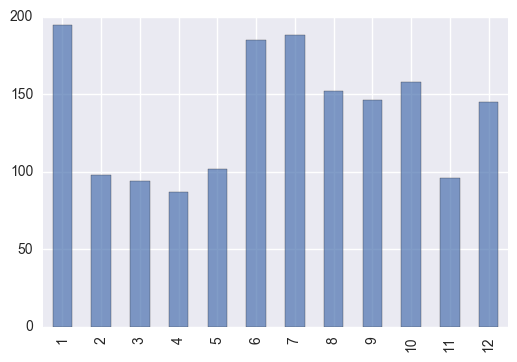

In [22]:
t = cast[cast.name == "Tom Cruise"]
rt = release_dates
t = t.merge(rt).sort_values('date')
t.date.dt.month.value_counts().sort_index().plot(kind = 'bar', alpha = 0.7)

#### Compare among three Khans in Bollywood

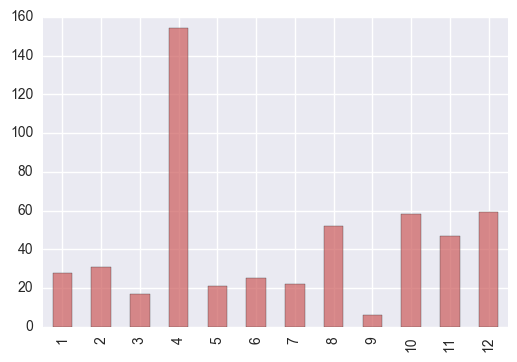

In [23]:
s = cast[cast.name == "Shah Rukh Khan"]
st = release_dates
s = s.merge(st)
s.date.dt.month.value_counts().sort_index().plot(kind = 'bar', color = 'indianred', alpha = 0.7)

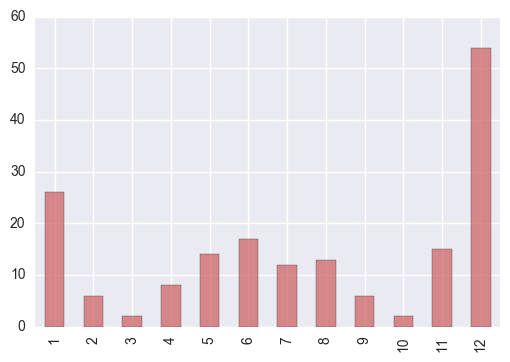

In [24]:
s1 = cast[cast.name == "Aamir Khan"]
st1 = release_dates
s1 = s1.merge(st1)
s1.date.dt.month.value_counts().sort_index().plot(kind = 'bar', color = 'indianred', alpha = 0.7)

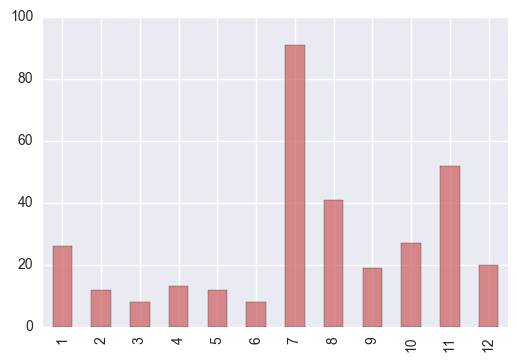

In [25]:
s2 = cast[cast.name == "Salman Khan"]
st2 = release_dates
s2 = s2.merge(st1)
s2.date.dt.month.value_counts().sort_index().plot(kind = 'bar', color = 'indianred', alpha = 0.7)